## Prédiction de prix d'une automobile : Random Forest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('annonces_auto.csv')

In [3]:

df.head()

,marque,version,annee,kilometrage,energie,emission_C02,consommation_mixte,transmission,portes,puissance_fiscale,places,lieu,prix
0,Renault,Modus 1.5 dCi 80 Confort Dynamique,2004.0,156000.0,Diesel,122.0,4.6,Manuelle,4.0,5.0,5.0,81300,3700.0
1,Renault,Mégane IV Berline TCe 140 EDC FAP Business,2019.0,4700.0,Essence,125.0,5.5,Automatique,4.0,7.0,5.0,85800,18500.0
2,Renault,Clio E-Tech 140 - 21N Intens,2022.0,2000.0,Hybride,NaN,NaN,Automatique,4.0,5.0,5.0,83400,21700.0
3,Toyota,Edition 1.8 hybrid 122ch,2022.0,10.0,Hybride,NaN,NaN,Automatique,4.0,5.0,NaN,NaN,27470.0
4,Renault,Laguna 1.9 DTI RTE,1999.0,320000.0,Diesel,NaN,5.5,Manuelle,4.0,6.0,5.0,28400,2000.0


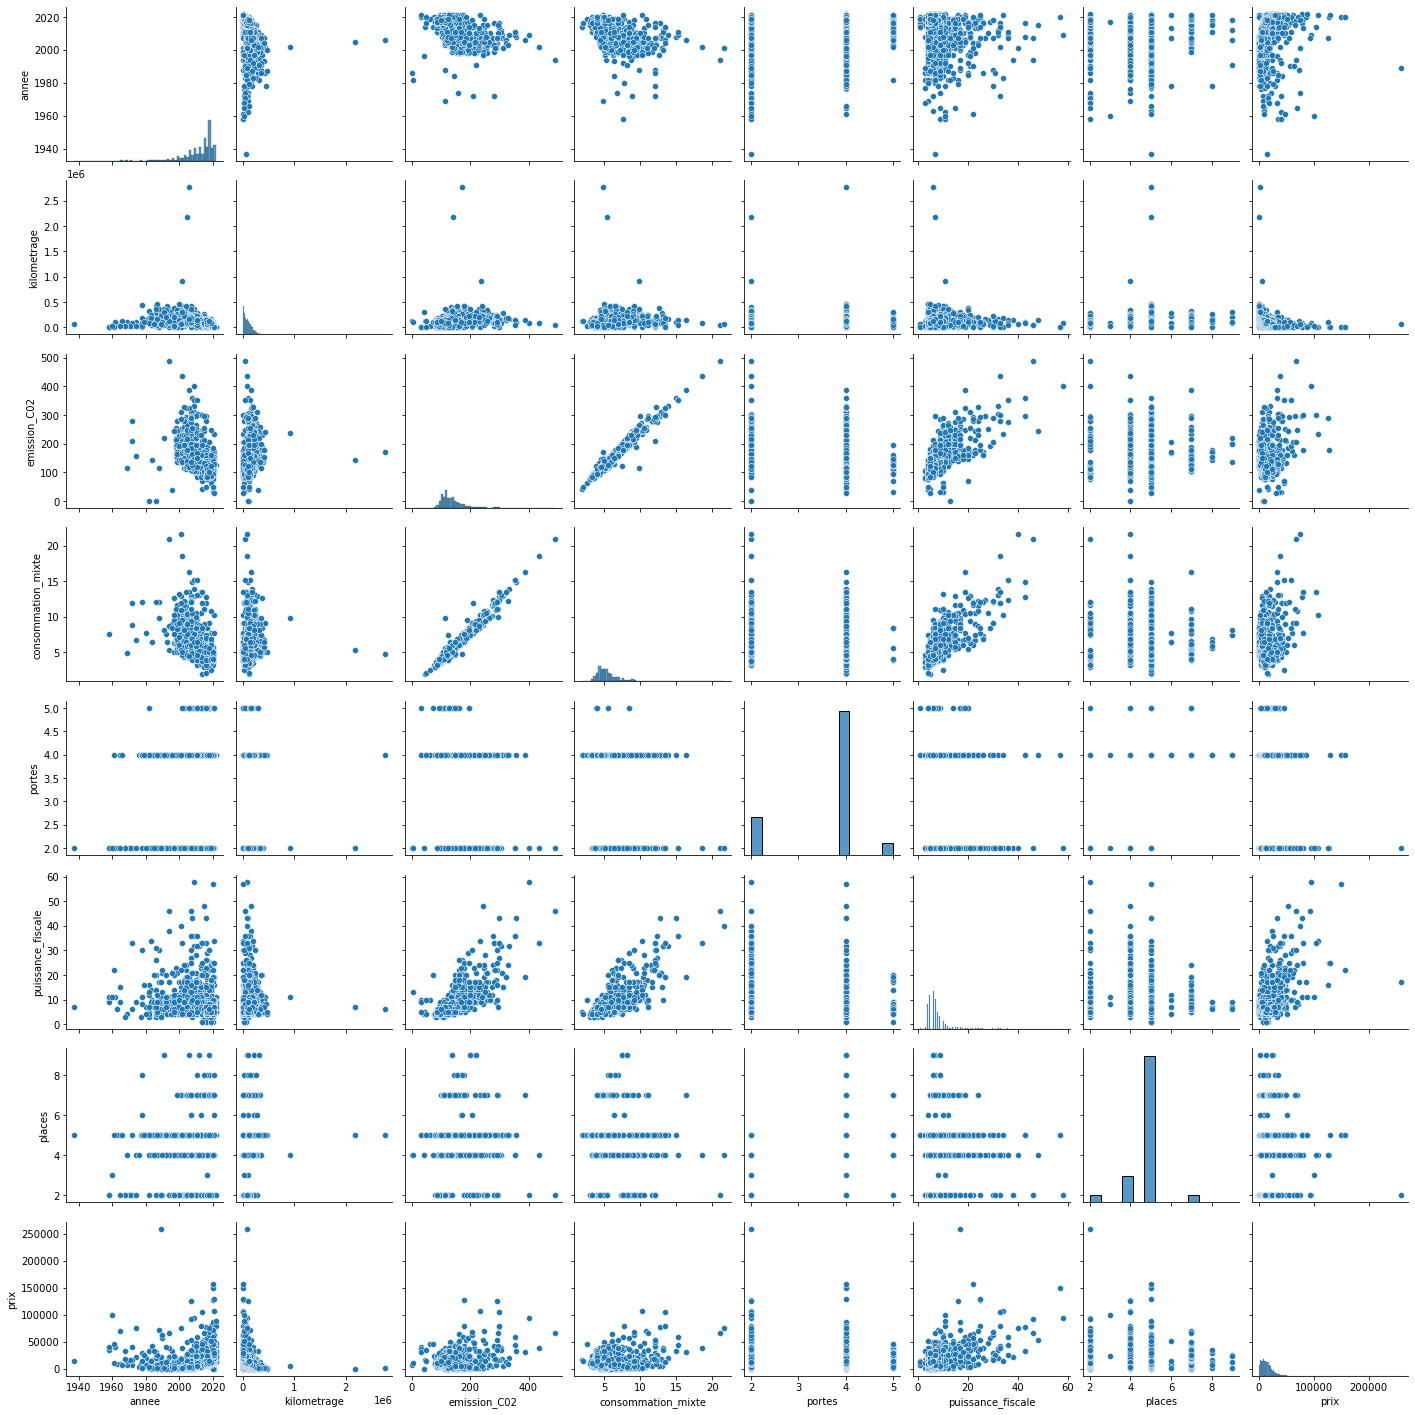

In [4]:
sns.pairplot(df)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix', ylabel='Density'>

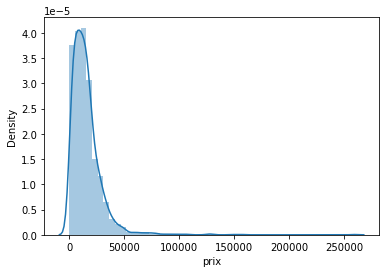

In [5]:
sns.distplot(df['prix'])

In [6]:
from  feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=['energie', 'transmission','marque'])

# fit the encoder
df2 = encoder.fit_transform( df.drop(['version','emission_C02','consommation_mixte', 'lieu'], axis=1).dropna() )

df2[['annee', 'kilometrage',	'portes', 'puissance_fiscale', 'places', 'prix']] = df2[['annee', 'kilometrage', 'portes', 'puissance_fiscale', 'places', 'prix']].astype(int)


C:\Users\Eric Bertrand\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


##  Random Forest Model

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


In [9]:
y = df2['prix']
X = df2.drop(['prix'], axis=1)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [16]:

n_samples, n_features = 10, 5
rng = np.random.RandomState(42)
SVRpipe = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel='rbf'))

In [17]:
SVRpipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [19]:
SVRpipe.score(X_test,y_test)

-0.051379988353724704

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVRpipe, X_train, y_train, cv=5)

In [21]:
r2_score(y_train_pred,y_train)

-5553.352803571352

#### Gridsearch of Hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'kernel' : ('linear', 'poly',
        'rbf', 'sigmoid'),
        'C' : [1,5,10],
        'degree' : [3,8],
        'coef0' : [0.01,10,0.5],
        'gamma' : ('auto','scale')}



grid = GridSearchCV( SVR(), param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

print 
(grid.best_score_ , grid.best_params_)

In [81]:
## Best Model
SVR2 = SVR(bootstrap= True, max_features = 'auto', min_samples_split = 2, n_estimators = 10)
SVR2.fit(X_train, y_train)
y_pred = SVR2.predict(X_test)
r2_score(y_test, y_pred)



0.6939407976023413

In [76]:
# Sérialisation du modèle pour export
# import pickle
# with open('voiture_model_RFR.pkl','wb') as f:
#     pickle.dump(RFR2,f)

In [ ]:
# with open('voiture_model_Y_test.pkl','wb') as f:
#     pickle.dump(y_test,f)

In [84]:
# import pickle
# with open('voiture_model_X_test.pkl','wb') as f:
#     pickle.dump(X_test,f)
